# INTRODUCTION

In [ ]:
# LOADING NECESSARY PACKAGES AND TOOLS

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
!pip install yfinance
!pip install mplfinance

Selecting previously unselected package libta-lib0.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 270 kB 5.1 MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.21-cp37-cp37m-linux_x86_64.whl size=1444893 sha256=66ab77c3596a27bb07241fdab8ed3ad7dbaa5379a0e2686f0d5453f1bb12a53c
  Stored in directory: /root/.cache/pip/wheels/32/3c/86/8dfaee7c11df54449f188172fcf66ae6d134f3118d0237df4a
Successfully built ta-lib
     |████

In [ ]:
#IMPORTING THE PACKAGES

In [ ]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import talib
%matplotlib inline

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import mplfinance as mpf
import yfinance as yf

In [ ]:
#GETTING DATA FROM LAST ONE YEAR

In [ ]:
motors = yf.download("TATAMOTORS.NS",'2020-11-01')
steel = yf.download("TATASTEEL.NS",'2020-11-01')
power = yf.download("TATAPOWER.NS",'2020-11-01')
elxsi = yf.download("TATAELXSI.NS",'2020-11-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
motors.to_csv("TATAMOTORS.NS.csv")
steel.to_csv("TATASTEEL.NS.csv")
power.to_csv("TATAPOWER.NS.csv")
elxsi.to_csv("TATAELXSI.NS.csv")

In [ ]:
#READING AND PREPARING THE DATASET

In [ ]:
tatamotors = pd.read_csv("TATAMOTORS.NS.csv")
tatasteel = pd.read_csv("TATASTEEL.NS.csv")
tatapower = pd.read_csv("TATAPOWER.NS.csv")
tataelxsi = pd.read_csv("TATAELXSI.NS.csv")

In [ ]:
tatamotors.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,133.649994,134.000000,131.100006,132.850006,132.850006,40388690
1,2020-11-03,135.000000,137.399994,133.550003,134.100006,134.100006,52071476
2,2020-11-04,135.600006,137.000000,134.000000,135.899994,135.899994,44675934
3,2020-11-05,137.000000,138.000000,136.000000,137.649994,137.649994,38928602
4,2020-11-06,137.649994,142.300003,137.649994,139.000000,139.000000,67966815


In [ ]:
tatasteel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,410.000000,412.500000,398.700012,402.850006,394.032196,13143109
1,2020-11-03,407.500000,412.200012,404.450012,406.899994,397.993530,12258034
2,2020-11-04,408.899994,415.049988,401.399994,403.899994,395.059204,13614366
3,2020-11-05,412.000000,428.250000,409.149994,425.500000,416.186432,26517756
4,2020-11-06,424.500000,432.899994,422.649994,426.500000,417.164520,17398193


In [ ]:
tatapower.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,52.400002,52.900002,52.000000,52.650002,52.002068,9575485
1,2020-11-03,52.700001,53.849998,52.650002,53.599998,52.940372,11671919
2,2020-11-04,53.250000,53.950001,52.299999,53.299999,52.644066,13555398
3,2020-11-05,53.500000,55.849998,53.500000,55.349998,54.668835,22517409
4,2020-11-06,55.349998,56.750000,54.500000,54.700001,54.026836,21662709


In [ ]:
tataelxsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,1526.849976,1536.949951,1490.000000,1496.300049,1486.788330,306379
1,2020-11-03,1490.000000,1539.800049,1465.449951,1529.800049,1520.075317,452979
2,2020-11-04,1535.800049,1579.000000,1517.949951,1535.250000,1525.490723,416409
3,2020-11-05,1554.949951,1585.000000,1542.000000,1565.699951,1555.747070,427882
4,2020-11-06,1569.949951,1594.099976,1536.599976,1553.000000,1543.127808,402941


In [ ]:
#ANALYSIS OF THE TATA STOCKS

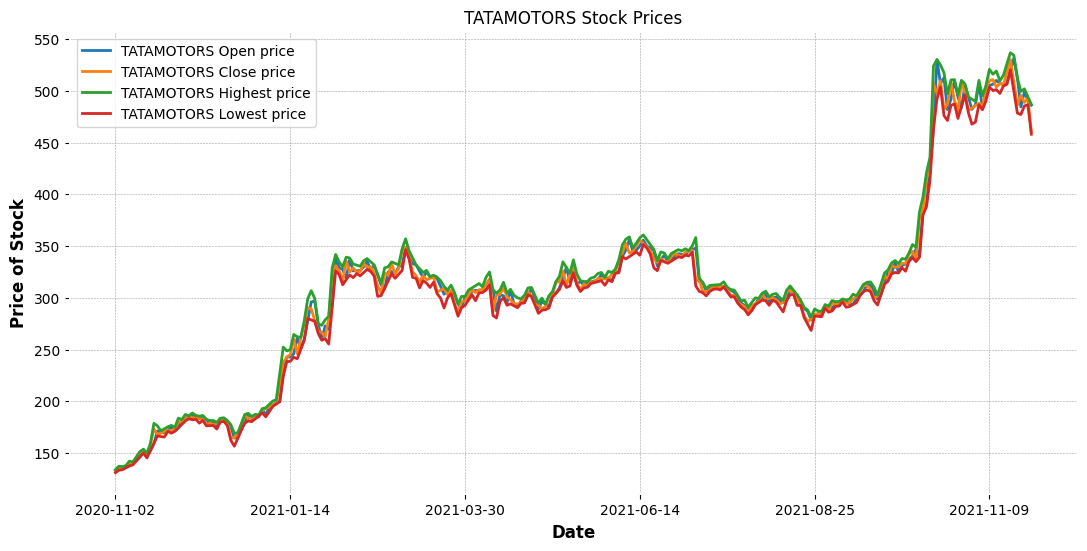

In [ ]:
tatamotors.plot(x = 'Date', y = ['Open','Close','High','Low'],
                label = ['TATAMOTORS Open price','TATAMOTORS Close price','TATAMOTORS Highest price','TATAMOTORS Lowest price'],
                figsize = (13,6))
plt.legend()
plt.title('TATAMOTORS Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price of Stock')
plt.show()

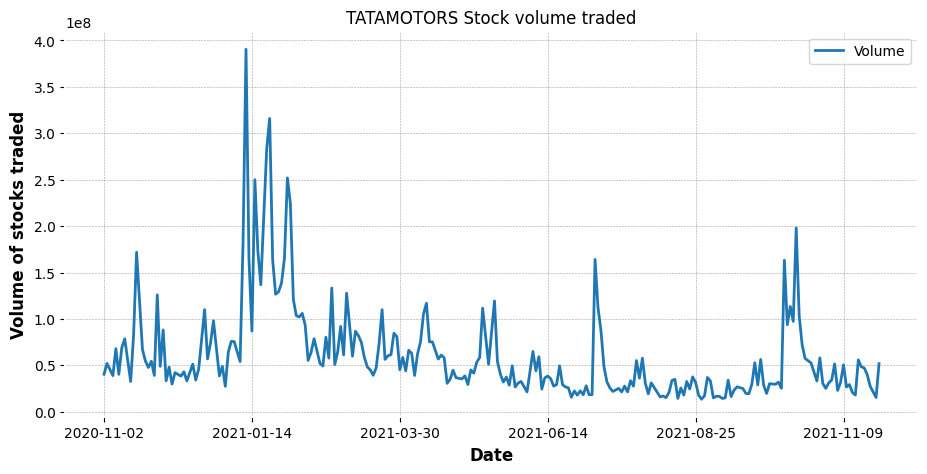

In [ ]:
tatamotors.plot(x = 'Date', y = 'Volume', figsize = (11,5))
plt.legend()
plt.title('TATAMOTORS Stock volume traded')
plt.xlabel('Date')
plt.ylabel('Volume of stocks traded')
plt.show()

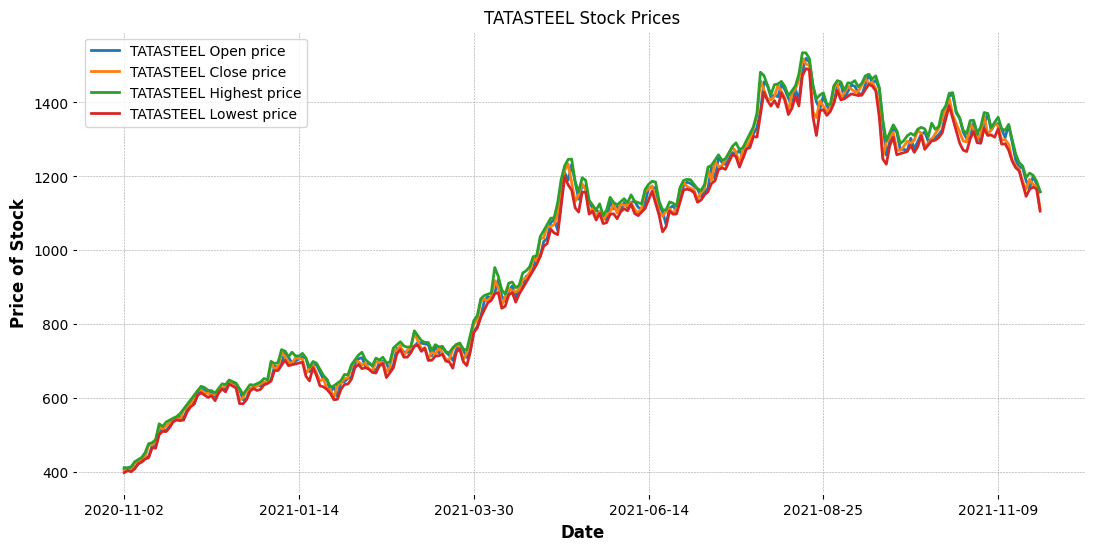

In [ ]:
tatasteel.plot(x = 'Date', y = ['Open','Close','High','Low'],
                label = ['TATASTEEL Open price','TATASTEEL Close price','TATASTEEL Highest price','TATASTEEL Lowest price'],
                figsize = (13,6))
plt.legend()
plt.title('TATASTEEL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price of Stock')
plt.show()

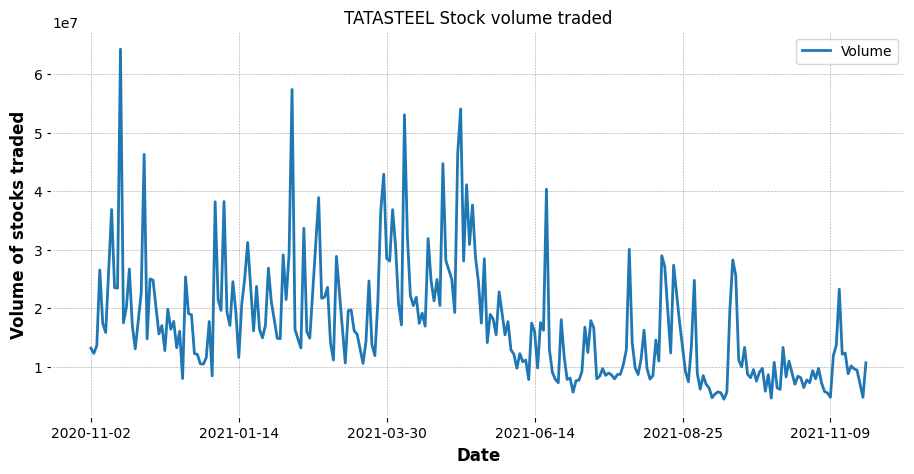

In [ ]:
tatasteel.plot(x = 'Date', y = 'Volume', figsize = (11,5))
plt.legend()
plt.title('TATASTEEL Stock volume traded')
plt.xlabel('Date')
plt.ylabel('Volume of stocks traded')
plt.show()

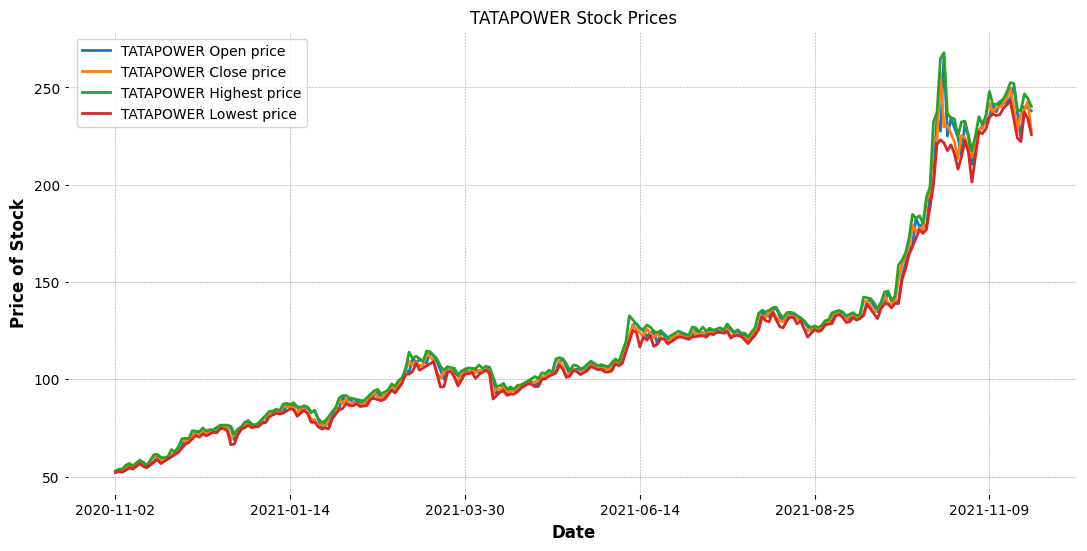

In [ ]:
tatapower.plot(x = 'Date', y = ['Open','Close','High','Low'],
                label = ['TATAPOWER Open price','TATAPOWER Close price','TATAPOWER Highest price','TATAPOWER Lowest price'],
                figsize = (13,6))
plt.legend()
plt.title('TATAPOWER Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price of Stock')
plt.show()

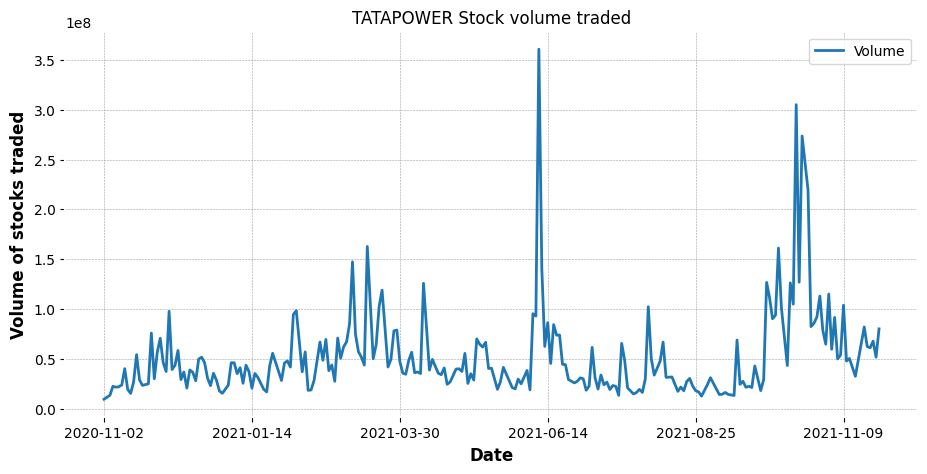

In [ ]:
tatapower.plot(x = 'Date', y = 'Volume', figsize = (11,5))
plt.legend()
plt.title('TATAPOWER Stock volume traded')
plt.xlabel('Date')
plt.ylabel('Volume of stocks traded')
plt.show()

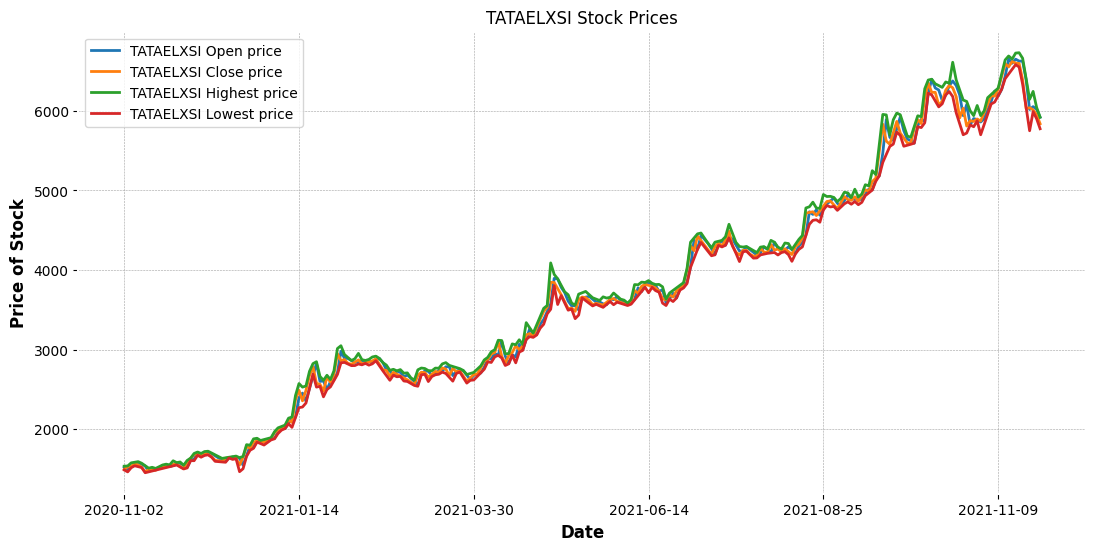

In [ ]:
tataelxsi.plot(x = 'Date', y = ['Open','Close','High','Low'],
                label = ['TATAELXSI Open price','TATAELXSI Close price','TATAELXSI Highest price','TATAELXSI Lowest price'],
                figsize = (13,6))
plt.legend()
plt.title('TATAELXSI Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price of Stock')
plt.show()

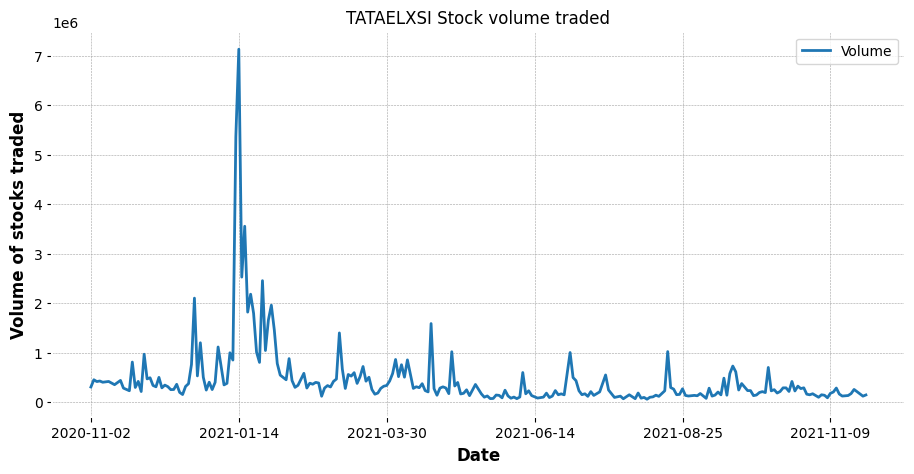

In [ ]:
tataelxsi.plot(x = 'Date', y = 'Volume', figsize = (11,5))
plt.legend()
plt.title('TATAELXSI Stock volume traded')
plt.xlabel('Date')
plt.ylabel('Volume of stocks traded')
plt.show()

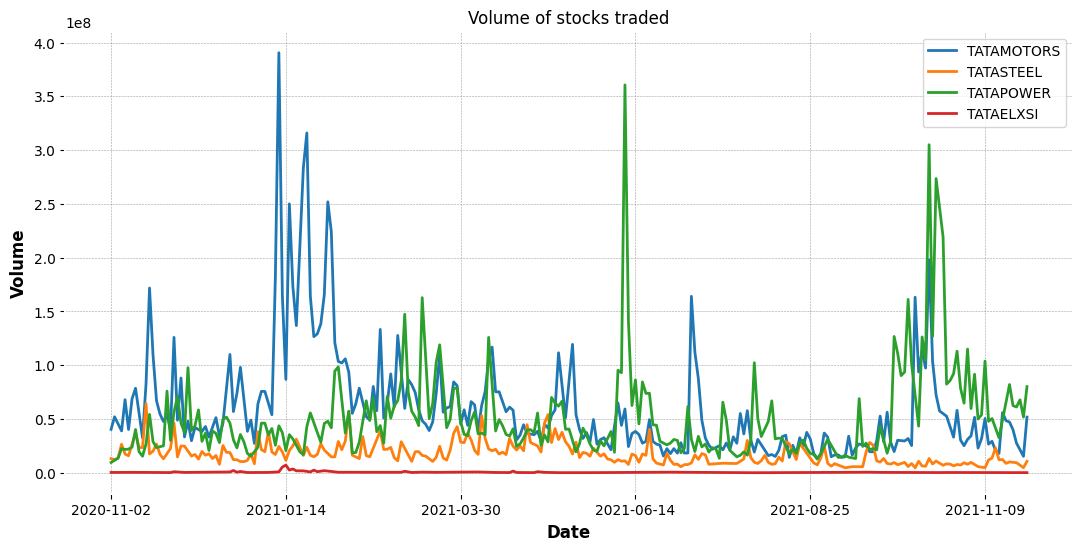

In [ ]:
plt.figure(figsize = (13,6))
tatamotors.set_index('Date')['Volume'].plot(label = 'TATAMOTORS')
tatasteel.set_index('Date')['Volume'].plot(label = 'TATASTEEL')
tatapower.set_index('Date')['Volume'].plot(label = 'TATAPOWER')
tataelxsi.set_index('Date')['Volume'].plot(label = 'TATAELXSI')
plt.legend()
plt.title('Volume of stocks traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [ ]:
tatapower.iloc[[tatapower['Volume'].argmax()]]

,Date,Open,High,Low,Close,Adj Close,Volume
844,2021-06-09,120.75,132.699997,119.0,124.650002,123.116005,360661838


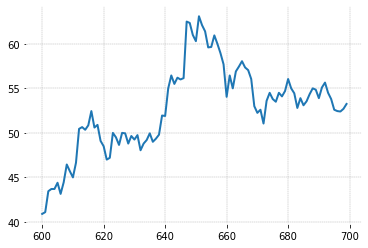

In [ ]:
tatapower.iloc[600:700]['Open'].plot()

#why did we observe an incease in volume of sales inspite of price increase
#https://www.livemint.com/companies/company-results/a-peek-into-tata-steel-s-stellar-june-quarter-performance-11628850950239.html

## Correlation & Scatter matrix  

In [ ]:
tata_stocks = pd.concat([tatamotors['Open'], tatasteel['Open'], tatapower['Open'], tataelxsi['Open']], axis = 1)
tata_stocks.columns = ['TATAMOTORS open', 'TATASTEEL open', 'TATAPOWER open','TATAELXSI open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff518832690>,
      dtype=object)

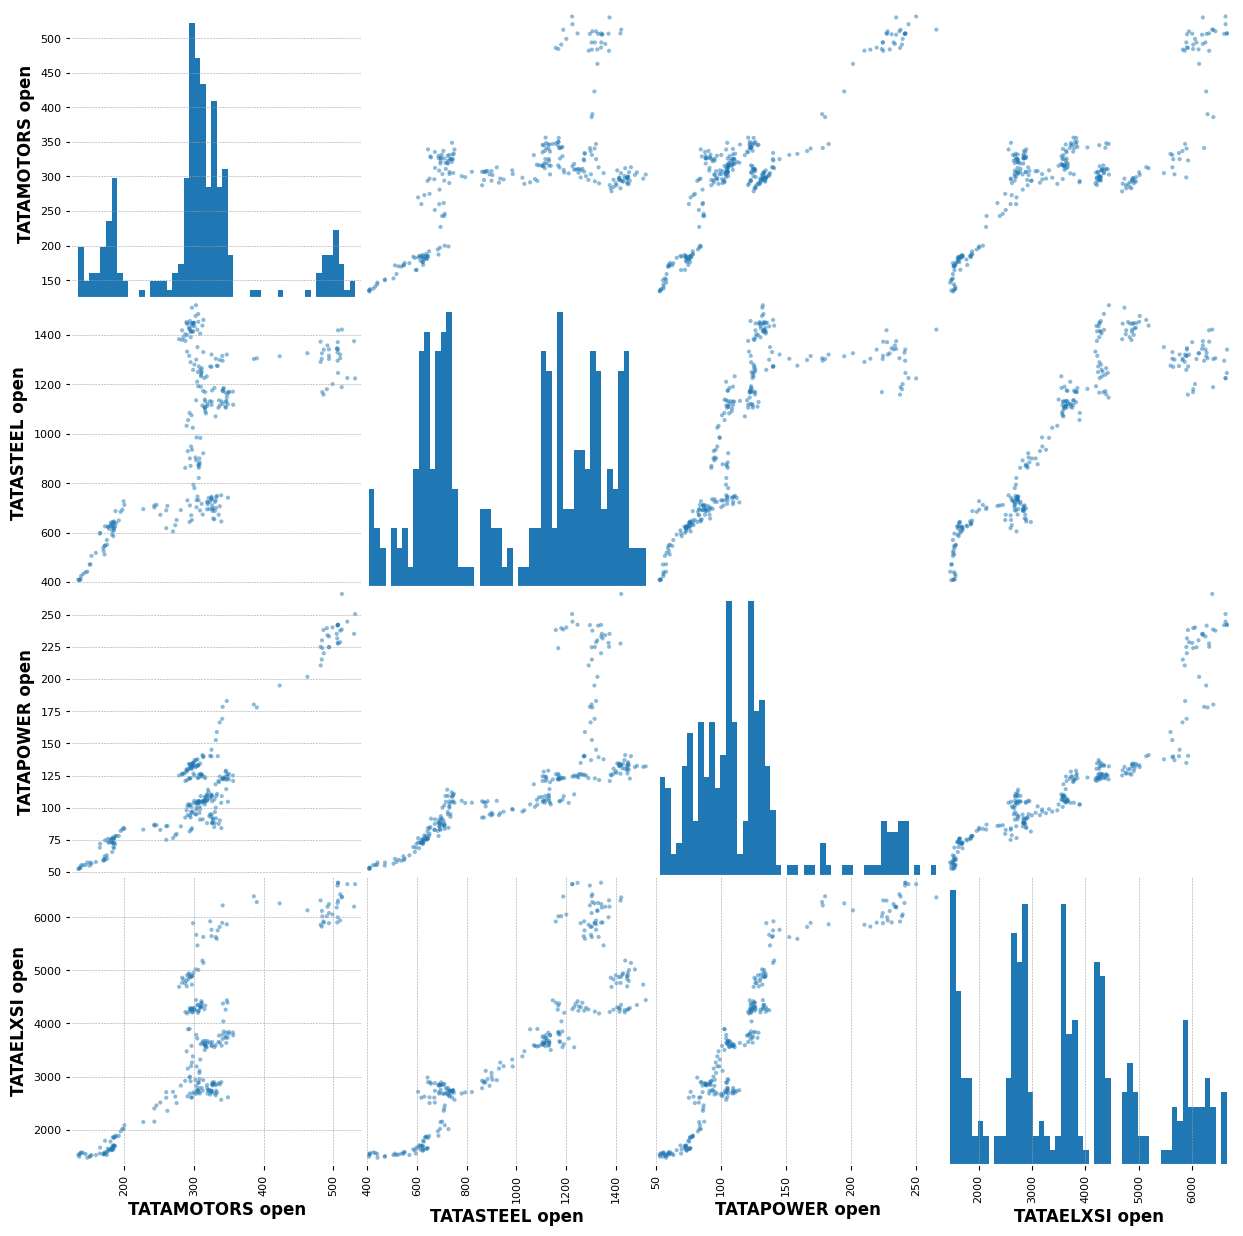

In [ ]:
scatter_matrix(tata_stocks, figsize = (15,15), hist_kwds = {'bins':50})

## Candlestick charts

In [ ]:
ttm = yf.download("TATAMOTORS.NS", start="2020-11-15",  interval="1d")
tts = yf.download("TATASTEEL.NS", start="2020-11-15",  interval="1d")
ttp = yf.download("TATAPOWER.NS", start="2020-11-15",  interval="1d")
ttx = yf.download("TATAELXSI.NS", start="2020-11-15", interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




---



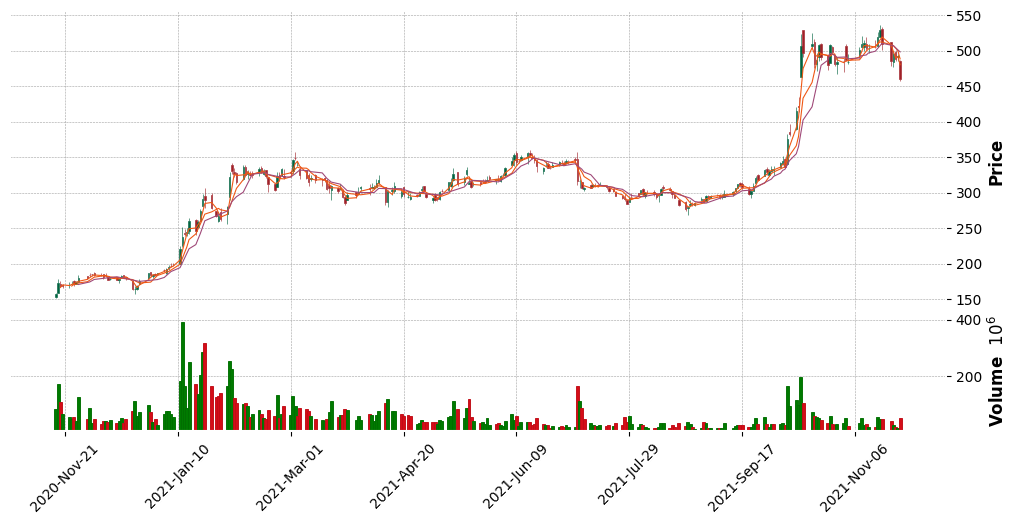

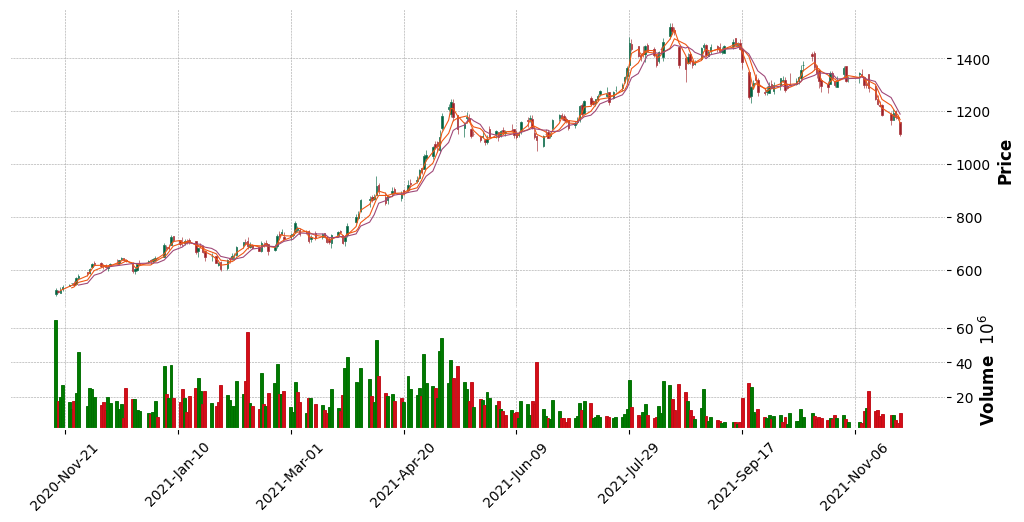

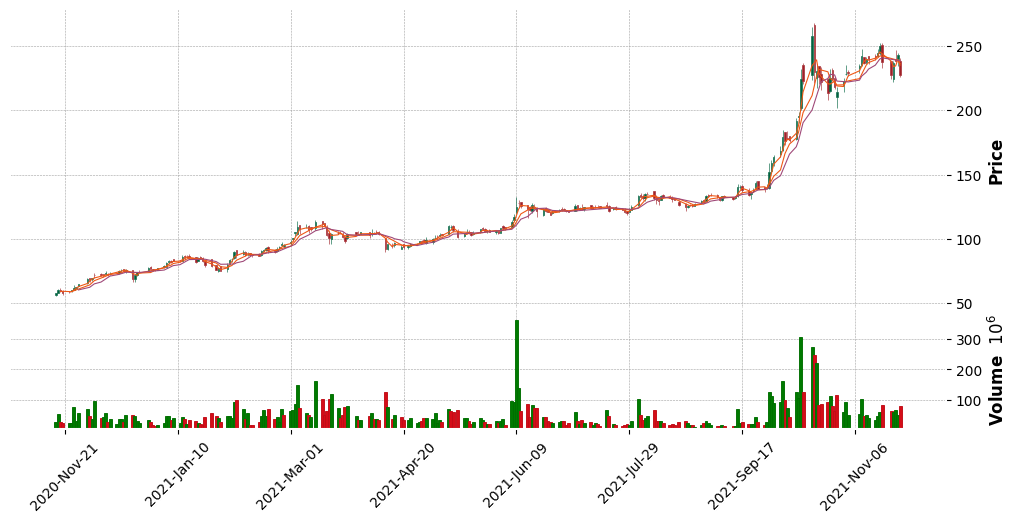

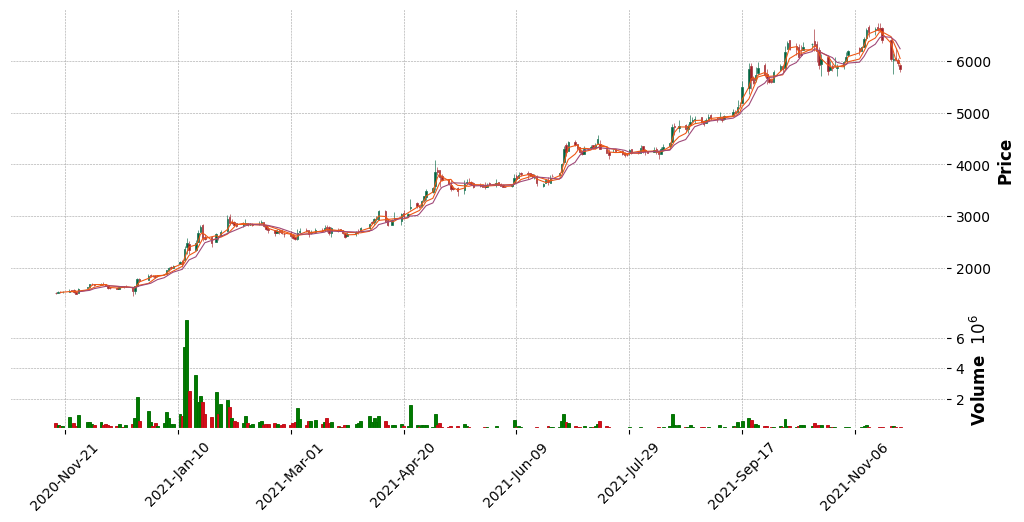

In [ ]:
mpf.plot(ttm, type = 'candle',style = 'charles',mav=(3,6,9),volume=True,show_nontrading=True, figsize = (13,6))
mpf.plot(tts, type = 'candle',style = 'charles',mav=(3,6,9),volume=True,show_nontrading=True, figsize = (13,6))
mpf.plot(ttp, type = 'candle',style = 'charles',mav=(3,6,9),volume=True,show_nontrading=True, figsize = (13,6))
mpf.plot(ttx, type = 'candle',style = 'charles',mav=(3,6,9),volume=True,show_nontrading=True, figsize = (13,6))

# Trend indicators

### Simple Moving Average(SMA)

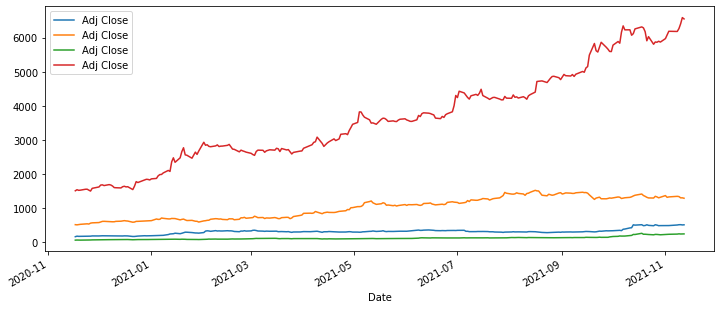

In [ ]:
ttm['Adj Close'].plot(legend=True,figsize=(12,5))
tts['Adj Close'].plot(legend=True,figsize=(12,5))
ttp['Adj Close'].plot(legend=True,figsize=(12,5))
ttx['Adj Close'].plot(legend=True,figsize=(12,5))

In [ ]:
ttm['SMA20'] = talib.SMA(ttm['Close'], timeperiod=20)
ttm['SMA50'] = talib.SMA(ttm['Close'], timeperiod=50)
ttm['SMA100'] = talib.SMA(ttm['Close'], timeperiod=100)

plt.plot(ttm['Close'], color='black', label='Daily Close Price')
plt.plot(ttm['SMA20'], color='green', label='SMA 20')
plt.plot(ttm['SMA50'], color='red', label='SMA 50')
plt.plot(ttm['SMA100'], color='purple', label='SMA 100')
plt.legend()
plt.title('Simple Moving Averages of Tata Motors')
plt.show()

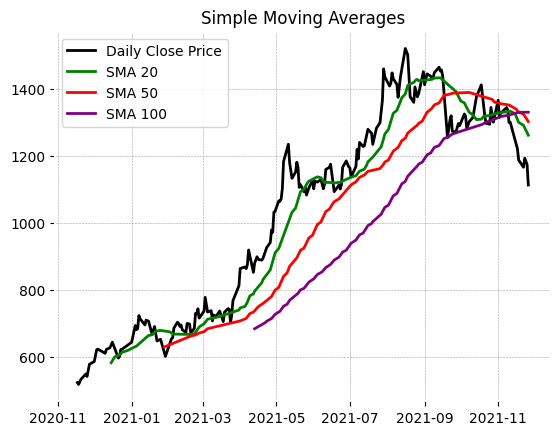

In [ ]:
tts['SMA20'] = talib.SMA(tts['Close'], timeperiod=20)
tts['SMA50'] = talib.SMA(tts['Close'], timeperiod=50)
tts['SMA100'] = talib.SMA(tts['Close'], timeperiod=100)

plt.plot(tts['Close'], color='black', label='Daily Close Price')
plt.plot(tts['SMA20'], color='green', label='SMA 20')
plt.plot(tts['SMA50'], color='red', label='SMA 50')
plt.plot(tts['SMA100'], color='purple', label='SMA 100')
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

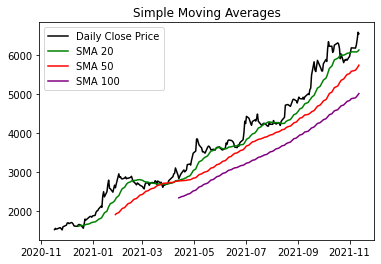

In [ ]:
ttx['SMA20'] = talib.SMA(ttx['Close'], timeperiod=20)
ttx['SMA50'] = talib.SMA(ttx['Close'], timeperiod=50)
ttx['SMA100'] = talib.SMA(ttx['Close'], timeperiod=100)

plt.plot(ttx['Close'], color='black', label='Daily Close Price')
plt.plot(ttx['SMA20'], color='green', label='SMA 20')
plt.plot(ttx['SMA50'], color='red', label='SMA 50')
plt.plot(ttx['SMA100'], color='purple', label='SMA 100')
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

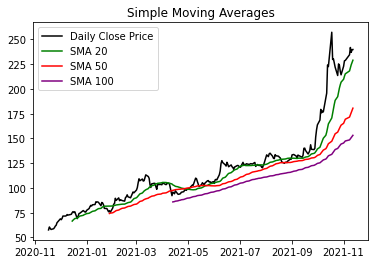

In [ ]:
ttp['SMA20'] = talib.SMA(ttp['Close'], timeperiod=20)
ttp['SMA50'] = talib.SMA(ttp['Close'], timeperiod=50)
ttp['SMA100'] = talib.SMA(ttp['Close'], timeperiod=100)

plt.plot(ttp['Close'], color='black', label='Daily Close Price')
plt.plot(ttp['SMA20'], color='green', label='SMA 20')
plt.plot(ttp['SMA50'], color='red', label='SMA 50')
plt.plot(ttp['SMA100'], color='purple', label='SMA 100')
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

### Exponential Moving Average (EMA)

EMA = Closing Price * multiplier + EMA_previous_day * (1-multiplier)

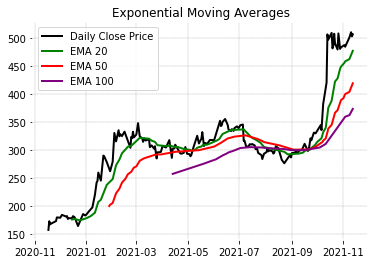

In [ ]:
ttm['EMA20'] = talib.EMA(ttm['Close'], timeperiod=20)
ttm['EMA50'] = talib.EMA(ttm['Close'], timeperiod=50)
ttm['EMA100'] = talib.EMA(ttm['Close'], timeperiod=100)

plt.plot(ttm['Close'], color='black', label='Daily Close Price')
plt.plot(ttm['EMA20'], color='green', label='EMA 20')
plt.plot(ttm['EMA50'], color='red', label='EMA 50')
plt.plot(ttm['EMA100'], color='purple', label='EMA 100')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()

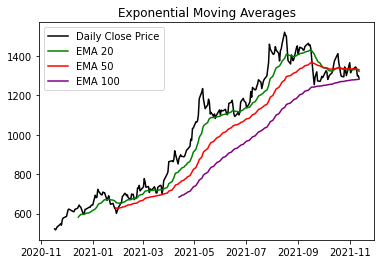

In [ ]:
tts['EMA20'] = talib.EMA(tts['Close'], timeperiod=20)
tts['EMA50'] = talib.EMA(tts['Close'], timeperiod=50)
tts['EMA100'] = talib.EMA(tts['Close'], timeperiod=100)

plt.plot(tts['Close'], color='black', label='Daily Close Price')
plt.plot(tts['EMA20'], color='green', label='EMA 20')
plt.plot(tts['EMA50'], color='red', label='EMA 50')
plt.plot(tts['EMA100'], color='purple', label='EMA 100')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()



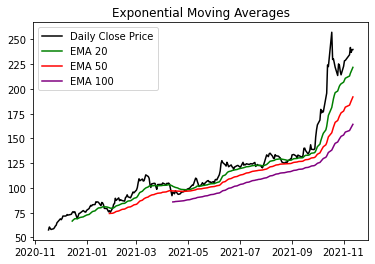

In [ ]:
ttp['EMA20'] = talib.EMA(ttp['Close'], timeperiod=20)
ttp['EMA50'] = talib.EMA(ttp['Close'], timeperiod=50)
ttp['EMA100'] = talib.EMA(ttp['Close'], timeperiod=100)

plt.plot(ttp['Close'], color='black', label='Daily Close Price')
plt.plot(ttp['EMA20'], color='green', label='EMA 20')
plt.plot(ttp['EMA50'], color='red', label='EMA 50')
plt.plot(ttp['EMA100'], color='purple', label='EMA 100')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()


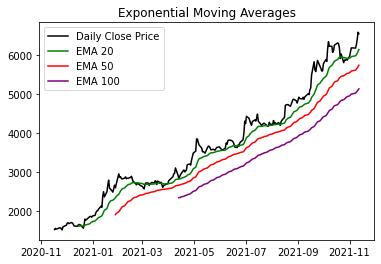

In [ ]:
ttx['EMA20'] = talib.EMA(ttx['Close'], timeperiod=20)
ttx['EMA50'] = talib.EMA(ttx['Close'], timeperiod=50)
ttx['EMA100'] = talib.EMA(ttx['Close'], timeperiod=100)

plt.plot(ttx['Close'], color='black', label='Daily Close Price')
plt.plot(ttx['EMA20'], color='green', label='EMA 20')
plt.plot(ttx['EMA50'], color='red', label='EMA 50')
plt.plot(ttx['EMA100'], color='purple', label='EMA 100')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()


### Average Directional Movement (ADX)

ADX ≤ 25: No trend;
25 < ADX ≤ 50: Trending;
ADX > 50: Strong Trending

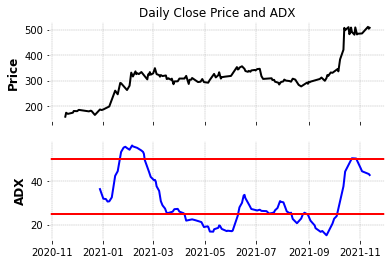

In [ ]:
ttm['ADX'] = talib.ADX(ttm['High'], ttm['Low'], ttm['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttm['Close'], color='black')
ax2.set_ylabel('ADX')
ax2.plot(ttm['ADX'], color='blue')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()

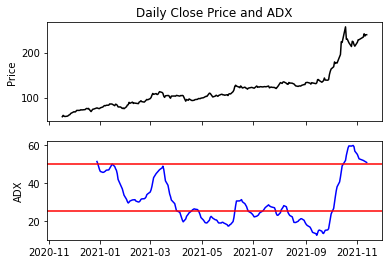

In [ ]:
ttp['ADX'] = talib.ADX(ttp['High'], ttp['Low'], ttp['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttp['Close'], color='black')
ax2.set_ylabel('ADX')
ax2.plot(ttp['ADX'], color='blue')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()

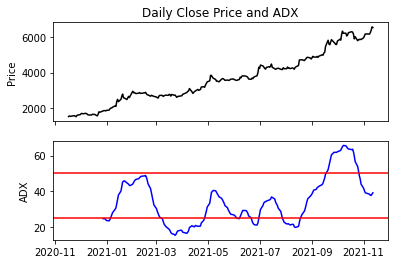

In [ ]:
ttx['ADX'] = talib.ADX(ttx['High'], ttx['Low'], ttx['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttx['Close'], color='black')
ax2.set_ylabel('ADX')
ax2.plot(ttx['ADX'], color='blue')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()


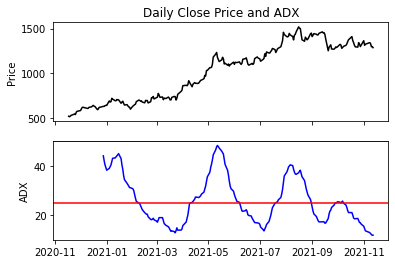

In [ ]:
tts['ADX'] = talib.ADX(tts['High'], tts['Low'], tts['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(tts['Close'], color='black')
ax2.set_ylabel('ADX')
ax2.plot(tts['ADX'], color='blue')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()


# Momentum indicators

### Relative Strength Index (RSI)

RSI > 70: Overbought;
RSI < 30: Oversold

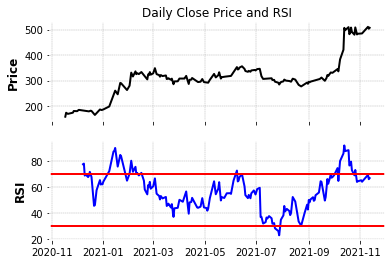

In [ ]:
ttm['RSI'] = talib.RSI(ttm['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttm['Close'],color = 'black')
ax2.set_ylabel('RSI')
ax2.plot(ttm['RSI'], color='blue')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()

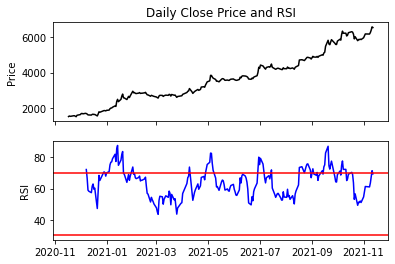

In [ ]:
ttx['RSI'] = talib.RSI(ttx['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttx['Close'],color = 'black')
ax2.set_ylabel('RSI')
ax2.plot(ttx['RSI'], color='blue')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()


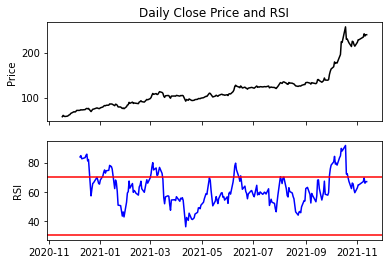

In [ ]:
ttp['RSI'] = talib.RSI(ttp['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(ttp['Close'],color = 'black')
ax2.set_ylabel('RSI')
ax2.plot(ttp['RSI'], color='blue')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()



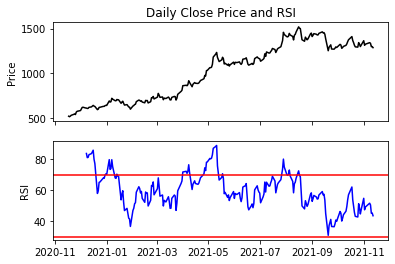

In [ ]:
tts['RSI'] = talib.RSI(tts['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(tts['Close'],color = 'black')
ax2.set_ylabel('RSI')
ax2.plot(tts['RSI'], color='blue')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()



# Volatility indicator

### Bollinger Bands

Middle band — A simple moving average (20 days by standard)

Upper band — 2 standard deviations above the middle band

Lower band — 2 standard deviations below the middle band

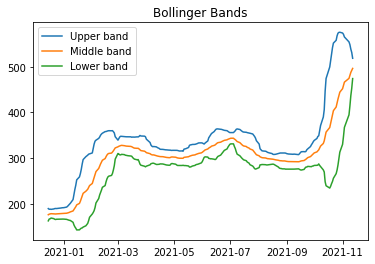

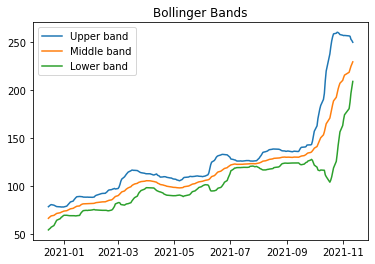

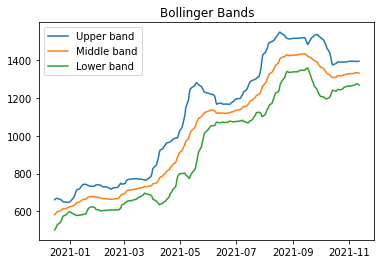

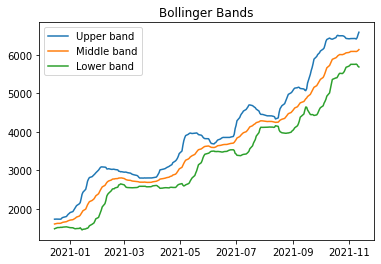

In [ ]:
upper, mid, lower = talib.BBANDS(ttm['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()
upper, mid, lower = talib.BBANDS(ttp['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()
upper, mid, lower = talib.BBANDS(tts['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()
upper, mid, lower = talib.BBANDS(ttx['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [ ]:
tatamotors['Returns'] = (tatamotors['Close']/tatamotors['Close'].shift(1)) - 1
tatamotors.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Amt Traded,Returns
0,2018-01-01,430.950012,436.399994,422.250000,424.450012,424.450012,6807536,2.933708e+09,NaN
1,2018-01-02,428.850006,440.850006,422.000000,439.299988,439.299988,15331261,6.574811e+09,0.034986
2,2018-01-03,440.399994,441.399994,431.950012,433.899994,433.899994,9794953,4.313697e+09,-0.012292
3,2018-01-04,430.000000,433.299988,425.750000,429.950012,429.950012,8395377,3.610012e+09,-0.009103
4,2018-01-05,431.250000,436.350006,429.799988,431.600006,431.600006,7021611,3.028070e+09,0.003838


In [ ]:
tatasteel['Returns'] = (tatasteel['Close']/tatasteel['Close'].shift(1)) - 1
tatasteel.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Amt Traded,Returns
0,2018-01-01,697.879578,700.642517,685.494019,688.066406,628.096130,1924920,1.343362e+09,NaN
1,2018-01-02,689.781311,696.688660,681.444885,694.830811,634.271057,2589691,1.786320e+09,0.009831
2,2018-01-03,697.403198,702.643250,696.688660,700.213806,639.184875,2765485,1.928658e+09,0.007747
3,2018-01-04,701.690552,727.366760,697.403198,724.318054,661.188171,8483966,5.953119e+09,0.034424
4,2018-01-05,727.890808,740.181091,726.461670,734.274109,670.276489,7490215,5.452059e+09,0.013745


In [ ]:
tatapower['Returns'] = (tatapower['Close']/tatapower['Close'].shift(1)) - 1
tatapower.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Amt Traded,Returns
0,2018-01-01,93.800003,100.000000,92.400002,97.150002,84.564468,33659894,3.157298e+09,NaN
1,2018-01-02,98.250000,100.250000,96.150002,99.699997,86.784126,29174233,2.866368e+09,0.026248
2,2018-01-03,100.300003,101.599998,99.599998,100.800003,87.741623,23056832,2.312600e+09,0.011033
3,2018-01-04,100.949997,101.000000,99.250000,99.599998,86.697067,6688043,6.751579e+08,-0.011905
4,2018-01-05,99.800003,101.800003,99.300003,99.550003,86.653564,11646646,1.162335e+09,-0.000502


In [ ]:
tataelxsi['Returns'] = (tataelxsi['Close']/tataelxsi['Close'].shift(1)) - 1
tataelxsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Amt Traded,Returns
0,2018-01-01,977.950012,977.950012,958.299988,964.049988,905.009277,362876,3.548746e+08,NaN
1,2018-01-02,968.750000,983.500000,950.150024,977.849976,917.964172,665737,6.449327e+08,0.014315
2,2018-01-03,985.000000,1006.000000,976.849976,994.049988,933.171997,1303199,1.283651e+09,0.016567
3,2018-01-04,999.500000,1005.000000,990.700012,998.349976,937.208679,404734,4.045316e+08,0.004326
4,2018-01-05,1000.849976,1015.000000,999.500000,1005.849976,944.249390,699783,7.003778e+08,0.007512


## Volatility

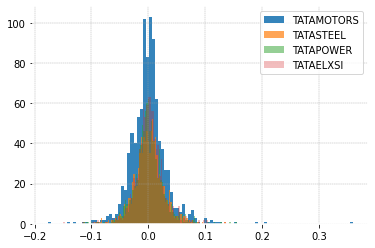

In [ ]:
tatamotors['Returns'].hist(bins = 100, label = 'TATAMOTORS', alpha = 0.9)
tatasteel['Returns'].hist(bins = 100, label = 'TATASTEEL', alpha = 0.7)
tatapower['Returns'].hist(bins = 100, label = 'TATAPOWER', alpha = 0.5)
tataelxsi['Returns'].hist(bins = 100, label = 'TATAELXSI', alpha = 0.3)
plt.legend()
#volatility appears to be similar for all the four stocks

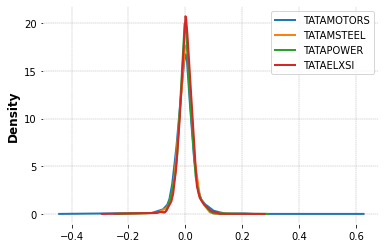

In [ ]:
#pdf
#normalised
tatamotors['Returns'].plot(kind = 'kde', label = 'TATAMOTORS')
tatasteel['Returns'].plot(kind = 'kde', label = 'TATAMSTEEL')
tatapower['Returns'].plot(kind = 'kde', label = 'TATAPOWER')
tataelxsi['Returns'].plot(kind = 'kde', label = 'TATAELXSI')
plt.legend()

## Box plots

Text(0.5, 1.0, 'Daily percentage return')

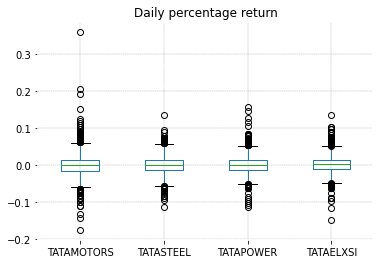

In [ ]:
box_plt = pd.concat([tatamotors['Returns'], tatasteel['Returns'], tatapower['Returns'], tataelxsi['Returns']], axis = 1)
box_plt.columns = ['TATAMOTORS', 'TATASTEEL', 'TATAPOWER', 'TATAELXSI']
box_plt.plot(kind  = 'box', patch_artist=False)
plt.title('Daily percentage return')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77a0950290>,
      dtype=object)

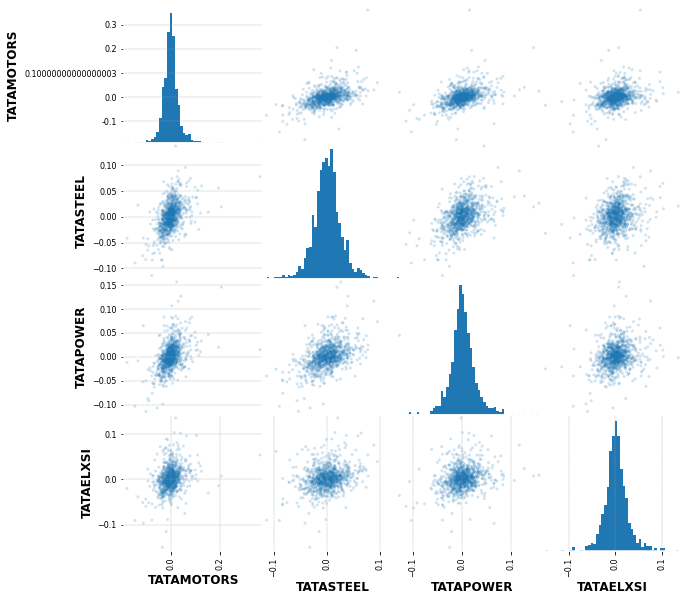

In [ ]:
scatter_matrix(box_plt, hist_kwds = {'bins':50}, alpha = 0.2, figsize = (10,10))

## Cumulative Returns

In [ ]:
tatamotors['Cumulative returns'] = (1 + tatamotors['Returns']).cumprod()
tatasteel['Cumulative returns'] = (1 + tatasteel['Returns']).cumprod()
tatapower['Cumulative returns'] = (1 + tatapower['Returns']).cumprod()
tataelxsi['Cumulative returns'] = (1 + tataelxsi['Returns']).cumprod()

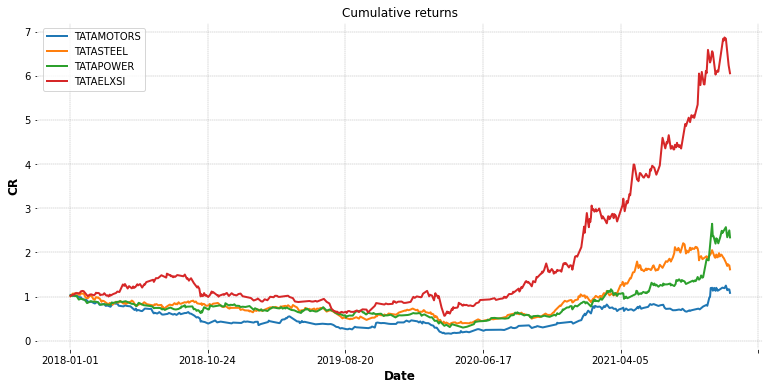

In [ ]:
plt.figure(figsize = (13,6))
tatamotors.set_index('Date')['Cumulative returns'].plot(label = 'TATAMOTORS')
tatasteel.set_index('Date')['Cumulative returns'].plot(label = 'TATASTEEL')
tatapower.set_index('Date')['Cumulative returns'].plot(label = 'TATAPOWER')
tataelxsi.set_index('Date')['Cumulative returns'].plot(label = 'TATAELXSI')
plt.legend()
plt.title('Cumulative returns')
plt.xlabel('Date')
plt.ylabel('CR')
plt.show()

# Prediction Of Share Price Using LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import classification_report, confusion matrix

In [ ]:
stock = input("Enter the Tata stock u want to predict \n 1) TATAMOTORS.NS \n 2) TATASTEEL.NS \n 3) TATAELXSI.NS \n 4) TATAPOWER.NS \n:")

Enter the Tata stock u want to predict 
 1) TATAMOTORS.NS 
 2) TATASTEEL.NS 
 3) TATAELXSI.NS 
 4) TATAPOWER.NS 
:TATASTEEL.NS


In [ ]:
data= yf.download(stock,'2018-01-01','2021-01-01', parse_dates=True)
print(data.head)

[*********************100%***********************]  1 of 1 completed
<bound method NDFrame.head of                   Open        High  ...   Adj Close    Volume
Date                                ...                      
2018-01-01  697.879578  700.642517  ...  628.096191   1924920
2018-01-02  689.781311  696.688660  ...  634.270996   2589691
2018-01-03  697.403198  702.643250  ...  639.184814   2765485
2018-01-04  701.690552  727.366760  ...  661.188171   8483966
2018-01-05  727.890808  740.181091  ...  670.276550   7490215
...                ...         ...  ...         ...       ...
2020-12-24  625.299988  636.950012  ...  608.678711  12090740
2020-12-28  628.250000  635.349976  ...  618.802246  10480517
2020-12-29  637.849976  639.650024  ...  618.362061  10416326
2020-12-30  632.950012  643.950012  ...  626.431458  11514428
2020-12-31  636.549988  653.500000  ...  629.561462  17713012

[738 rows x 6 columns]>


In [ ]:
#Prepare Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days =60

In [ ]:
x_train = []
y_train = []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

In [ ]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build the Model

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units = 50, return_sequences=True, input_shape= (x_train.shape[1], 1) ))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences =True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
#Predicting the next closest value

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs =25, batch_size=32)

Epoch 1/25
22/22 [==============================] - 7s 91ms/step - loss: 0.0312
Epoch 2/25
22/22 [==============================] - 2s 91ms/step - loss: 0.0083
Epoch 3/25
22/22 [==============================] - 2s 92ms/step - loss: 0.0075
Epoch 4/25
22/22 [==============================] - 2s 95ms/step - loss: 0.0068
Epoch 5/25
22/22 [==============================] - 2s 94ms/step - loss: 0.0057
Epoch 6/25
22/22 [==============================] - 2s 97ms/step - loss: 0.0053
Epoch 7/25
22/22 [==============================] - 2s 93ms/step - loss: 0.0053
Epoch 8/25
22/22 [==============================] - 2s 93ms/step - loss: 0.0049
Epoch 9/25
22/22 [==============================] - 2s 92ms/step - loss: 0.0047
Epoch 10/25
22/22 [==============================] - 2s 94ms/step - loss: 0.0049
Epoch 11/25
22/22 [==============================] - 2s 93ms/step - loss: 0.0044
Epoch 12/25
22/22 [==============================] - 2s 91ms/step - loss: 0.0041
Epoch 13/25
22/22 [==================

In [ ]:
''' Test Model Accuracy on Data '''

' Test Model Accuracy on Data '

In [ ]:
#Loading test data

In [ ]:
test_data = yf.download(stock,'2021-01-01')
print(test_data)

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2021-01-01   645.000000   649.700012  ...   629.023438   8411396
2021-01-04   649.000000   699.900024  ...   677.831238  38184955
2021-01-05   687.000000   693.849976  ...   665.653748  21545254
2021-01-06   684.000000   696.650024  ...   668.832581  19610522
2021-01-07   693.000000   731.500000  ...   706.978943  38232194
...                 ...          ...  ...          ...       ...
2021-11-22  1188.099976  1196.800049  ...  1165.050049   9621001
2021-11-23  1168.050049  1209.000000  ...  1192.050049   9382963
2021-11-24  1200.400024  1202.949951  ...  1178.500000   6767101
2021-11-25  1180.000000  1186.599976  ...  1173.650024   4750286
2021-11-26  1157.900024  1159.500000  ...  1112.300049  10645526

[222 rows x 6 columns]


In [ ]:
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
print(total_dataset)

Date
2018-01-01     688.066406
2018-01-02     694.830811
2018-01-03     700.213806
2018-01-04     724.318054
2018-01-05     734.274109
                 ...     
2021-11-22    1165.050049
2021-11-23    1192.050049
2021-11-24    1178.500000
2021-11-25    1173.650024
2021-11-26    1112.300049
Name: Close, Length: 960, dtype: float64


In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [ ]:
x_test = []

In [ ]:
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

In [ ]:
x_test = np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))


In [ ]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


Predicted stock price for TATASTEEL.NS


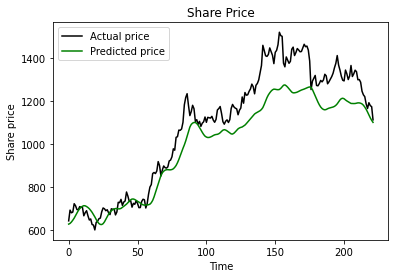

In [ ]:
print("Predicted stock price for",stock)
plt.plot(actual_prices, color = "black", label="Actual price")
plt.plot(predicted_prices, color = "green", label="Predicted price")
plt.title("Share Price")
plt.xlabel('Time')
plt.ylabel("Share price")
plt.legend()
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs + 1),0] ]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))
print(real_data)

[[[2.40877569]
  [2.42836093]
  [2.34910676]
  [2.37731761]
  [2.41496593]
  [2.40146935]
  [2.38462395]
  [2.38695799]
  [2.42176488]
  [2.45515094]
  [2.43252162]
  [2.43820422]
  [2.40096196]
  [2.2977592 ]
  [2.02823438]
  [2.10758988]
  [2.13519201]
  [2.16137305]
  [2.0667959 ]
  [2.06354866]
  [2.0847574 ]
  [2.11438908]
  [2.1008925 ]
  [2.11905691]
  [2.17243427]
  [2.15761843]
  [2.08262652]
  [2.10150122]
  [2.12575453]
  [2.15021051]
  [2.18248046]
  [2.23362536]
  [2.2757386 ]
  [2.34880253]
  [2.25919768]
  [2.21130027]
  [2.15325484]
  [2.11580967]
  [2.10982259]
  [2.21201056]
  [2.17649337]
  [2.12260863]
  [2.15579178]
  [2.25513858]
  [2.15112395]
  [2.17629047]
  [2.21119869]
  [2.19638285]
  [2.12047774]
  [2.12260863]
  [2.09754369]
  [2.01270825]
  [1.97891638]
  [1.96115778]
  [1.89326906]
  [1.84953233]
  [1.90433028]
  [1.87682973]
  [1.86698644]
  [1.74247338]]]


In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(" Predicted Price for ",stock," is ", prediction)

 Predicted Price for  TATASTEEL.NS  is  [[1089.9702]]


# Prediction of Share Price Using ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
Predicting_stock = input("Enter the Tata stock u want to predict \n 1) TATAMOTORS.NS \n 2) TATASTEEL.NS \n 3) TATAELXSI.NS \n 4) TATAPOWER.NS \n:")

Enter the Tata stock u want to predict 
 1) TATAMOTORS.NS 
 2) TATASTEEL.NS 
 3) TATAELXSI.NS 
 4) TATAPOWER.NS 
:TATASTEEL.NS 


In [ ]:
df = yf.download(Predicting_stock, start="2018-01-01", interval="1d")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,697.879578,700.642517,685.494019,688.066406,628.096069,1924920
2018-01-02,689.781311,696.688660,681.444885,694.830811,634.270996,2589691
2018-01-03,697.403198,702.643250,696.688660,700.213806,639.184875,2765485
2018-01-04,701.690552,727.366760,697.403198,724.318054,661.188171,8483966
2018-01-05,727.890808,740.181091,726.461670,734.274109,670.276489,7490215


In [ ]:
# Dividing the dataset into 70:30 ratio
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
# Since we'll be predicting the End of Day(EOD) "CLOSE" values, taking only the close column
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
# We'll be storing the predicted variables here
model_predictions = []
N_test_observations = len(test_data)

In [ ]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 678.4038371731381


In [ ]:
print(yhat[len(yhat)-1])

1171.5995764664735


Stock prediction for TATASTEEL.NS 


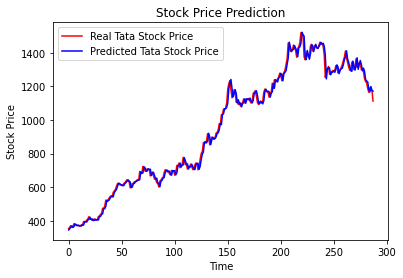

In [ ]:
print("Stock prediction for",Predicting_stock)
plt.plot(test_data, color='Red', label='Real Tata Stock Price')
plt.plot(model_predictions, color='Blue', label='Predicted Tata Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()